We will now use python to do some wavelet analysis. As usual, we have to import a few packages.

In [50]:
import h5py
import numpy as np
import scipy as sp
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook


sns.set()
sns.set_style("whitegrid")

<IPython.core.display.Javascript object>


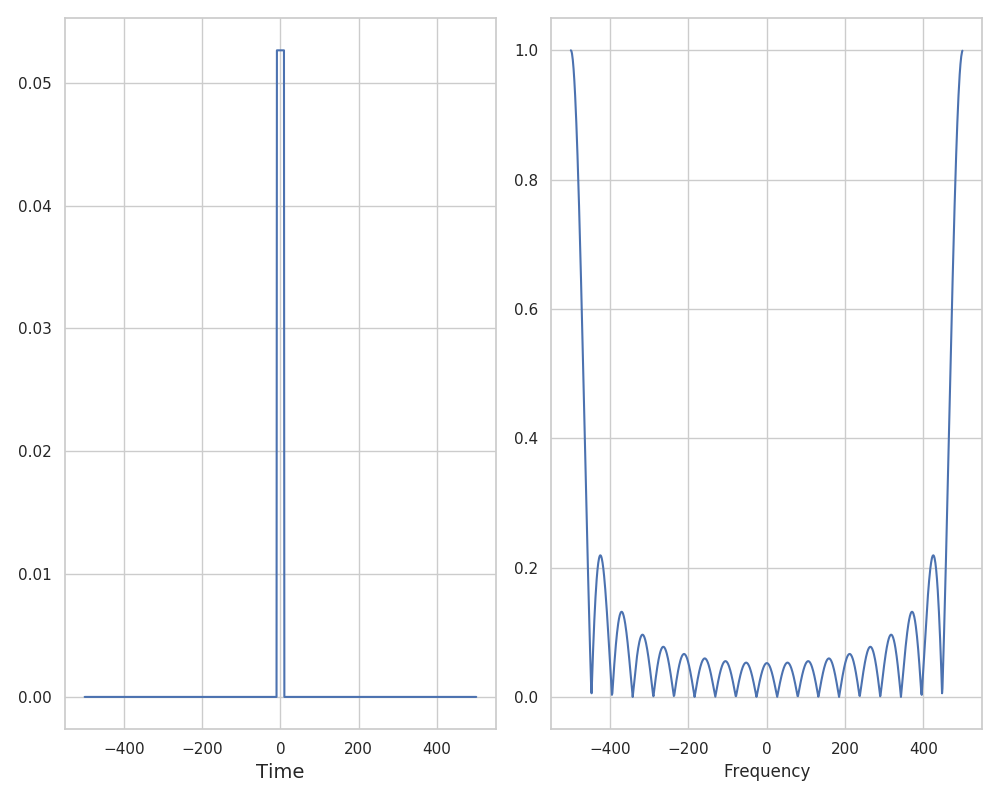

In [46]:
t = np.arange(1, 1002)
t = t - np.mean(t)
g = np.zeros(len(t))
g[np.abs(t) < 10] = 1/19

fig, ax = plt.subplots(1, 2, figsize=(10, 8))

ax[0].plot(t, g)
ax[0].set_xlabel("Time", fontsize=14)

ax[1].plot(t, np.abs(sp.fft(g)))
ax[1].set_xlabel("Frequency")

fig.tight_layout()

Hello

<IPython.core.display.Javascript object>


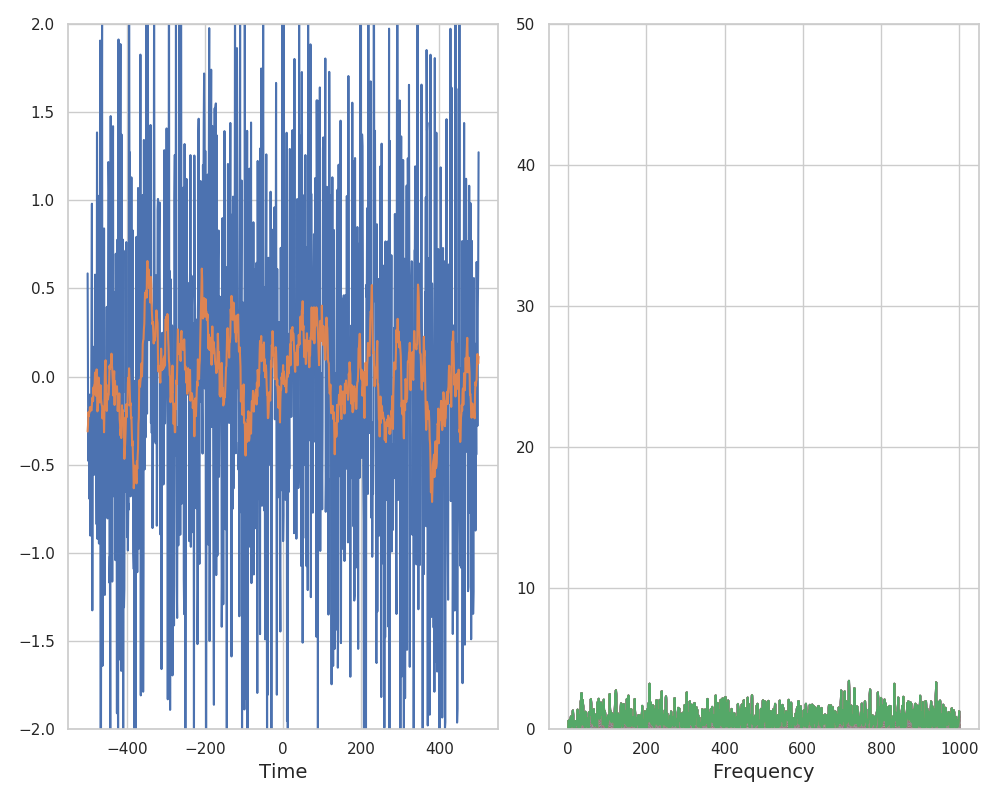

In [48]:
x = np.random.randn(1001,1)
fx = sp.ndimage.convolve1d(x, np.ones(19)/19, mode="mirror", axis=0)

fig, ax = plt.subplots(1, 2, figsize=(10, 8))

ax[0].plot(t, x)
ax[0].plot(t, fx)
ax[0].set_xlabel("Time", fontsize=14)
ax[0].set_ylim(-2, 2)

ax[1].plot(np.abs(sp.fft(x)))
ax[1].plot(np.abs(sp.fft(fx)))
ax[1].plot(np.abs(sp.fft(x)*sp.fft(g)))
ax[1].set_xlabel("Frequency", fontsize=14)
ax[1].set_ylim(0, 50)

fig.tight_layout()

Hello

In [58]:
datadir = "../data/"
filename = "m1244.mat"
with h5py.File(datadir + filename,'r') as file:
    # Looking at contents of file
    print(file.keys())
    # Finding the variables contained in the key
    variables = list(file.get("{}".format(filename[:filename.find(".")])))
    print(variables)

    # Storing the variables in a dictionary
    data = {}
    for i in variables:
        data[i] = np.array(file.get("{0}/{1}".format(filename[:filename.find(".")], i))).squeeze()  # removes excessive dims

    # Convert a complex tuple (real, imag) to a complex number a + jb
    cv = np.zeros((data["cv"].shape[0], data["cv"].shape[1]), dtype=complex)
    for i in range(len(data["cv"])):
        for j in range(len(data["cv"][0])):
            cv[i][j] = data["cv"][i][j][0] + 1j*data["cv"][i][j][1]
    data["cv"] = cv

    # Convert matlab datenum format to a datetime object for aesthetics
    num = []
    for i in data["num"]:
        num.append(dt.datetime.fromordinal(int(i)) + dt.timedelta(days=i%1) - dt.timedelta(days = 366))
    data["num"] = np.array(num)

<KeysViewHDF5 ['#refs#', 'm1244']>
['creator', 'cv', 'depths', 'description', 'lat', 'link', 'lon', 'num', 'p', 't', 'timestamp']


Hello

In [59]:
delta = data["num"][1] - data["num"][0]
delta
cv_3 = data["cv"][3]
cv_3 = cv_3 - np.mean(cv_3)
psio, lamb = sp.windows.dpss(len(cv_3), 16)

 

SyntaxError: invalid syntax (<ipython-input-59-35393574fc87>, line 3)